In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df=df.set_index('Id')

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


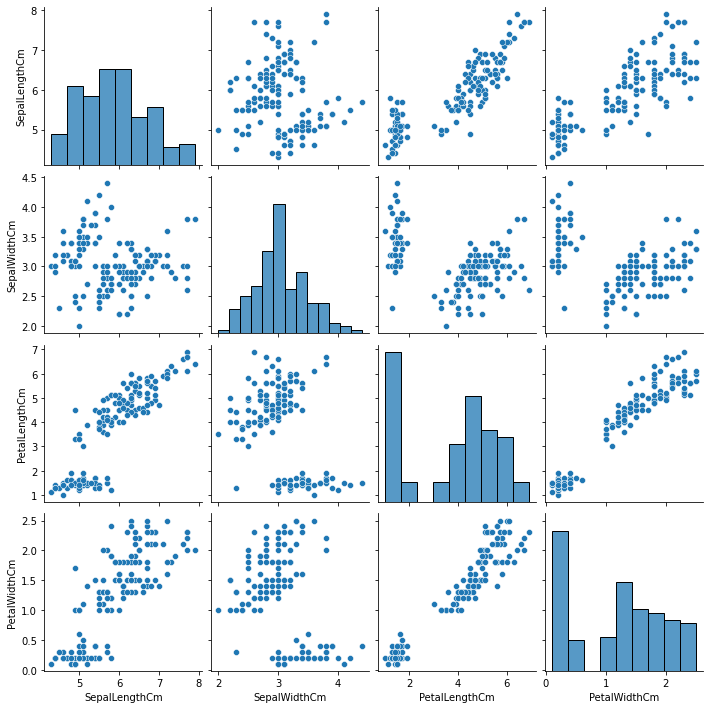

In [7]:
sns.pairplot(df)

<AxesSubplot:>

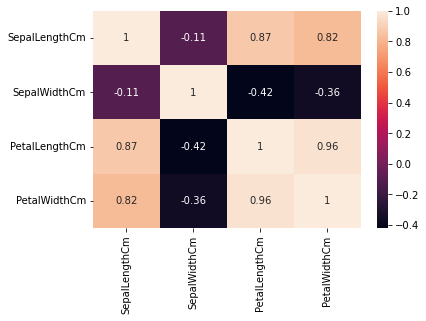

In [8]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Scatter Plot')

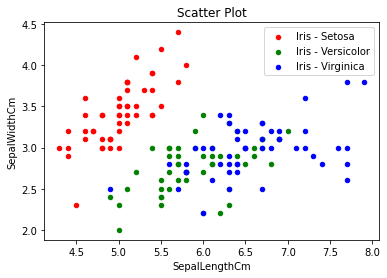

In [9]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

Text(0.5, 1.0, 'Scatter Plot')

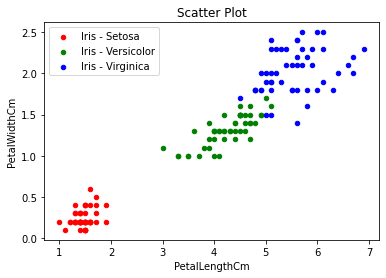

In [10]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

From above two graphs the correlation between Petal width and length better describes clustering per species. Therefore, for the K means model I will use only these two features.

For the testing and learning purposes implementing elbow method to find the K

In [11]:
X=df.iloc[:,[2,3]].values

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


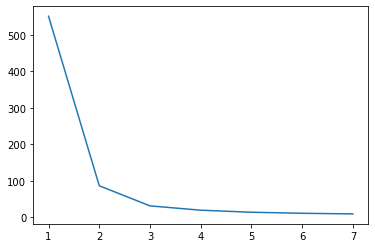

In [12]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,8),wcss)

Checking silhouette method

In [13]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(df.iloc[:,[2,3]], cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.7651755502866581
For n_clusters = 3 The average silhouette_score is : 0.6602760882193361
For n_clusters = 4 The average silhouette_score is : 0.612530696724084
For n_clusters = 5 The average silhouette_score is : 0.5881403468025436
For n_clusters = 6 The average silhouette_score is : 0.5773076735641963
For n_clusters = 7 The average silhouette_score is : 0.5583441807227029
For n_clusters = 8 The average silhouette_score is : 0.588616624132445


As per elbow and silhouette method K value seems like 2, but as we are aware of 3 kind of species, we will continue with the K value of 3.

## K Means Clustering Method

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
kmeans.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

Plotting new clusters

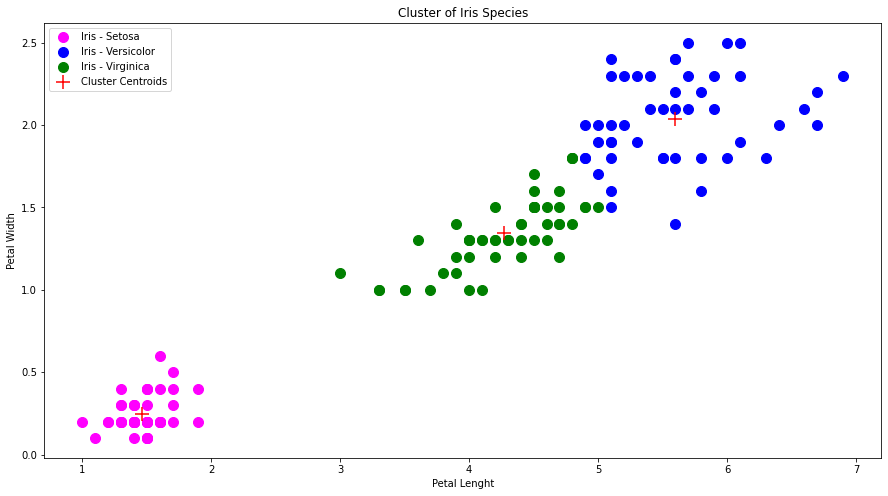

In [16]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Iris - Setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris - Versicolor')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris - Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Cluster Centroids',marker = "+")
plt.title('Cluster of Iris Species')
plt.xlabel('Petal Lenght')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

## Hierarchical Clustering method

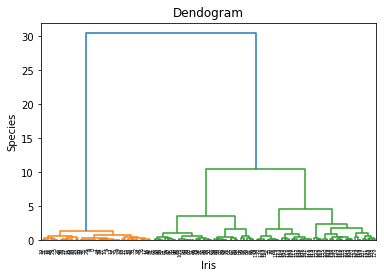

In [17]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) 
plt.title('Dendogram')
plt.xlabel('Iris')
plt.ylabel('Species')
plt.show()

In [18]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Plotting Clusters from HC

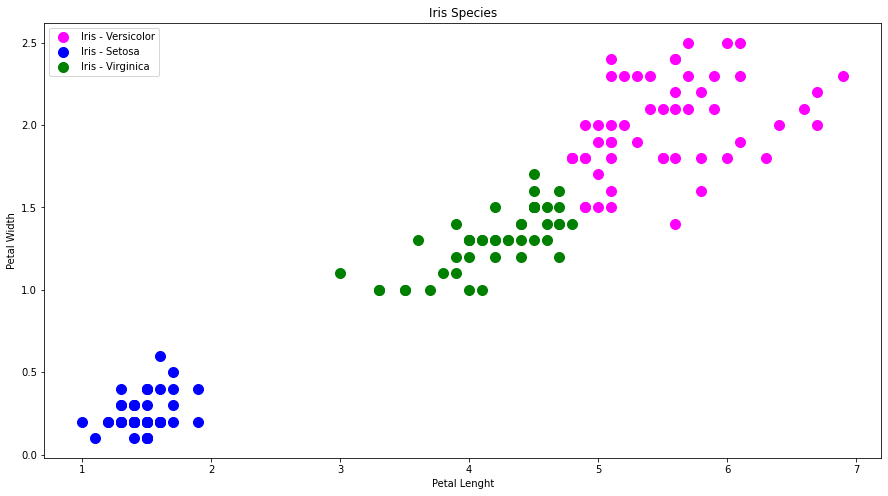

In [19]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Iris - Versicolor')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Iris - Setosa')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Iris - Virginica')
plt.title('Iris Species')
plt.xlabel('Petal Lenght')
plt.ylabel('Petal Width')
plt.legend()
plt.ioff()
plt.show()